![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [4]:
import pandas as pd
import numpy as np

crimes = pd.read_csv('crimes.csv',dtype={'TIME OCC': str})
crimes.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [7]:
crimes["Houer_OCC"] =crimes["TIME OCC"].str[:2].astype(int)
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Houer_OCC
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9


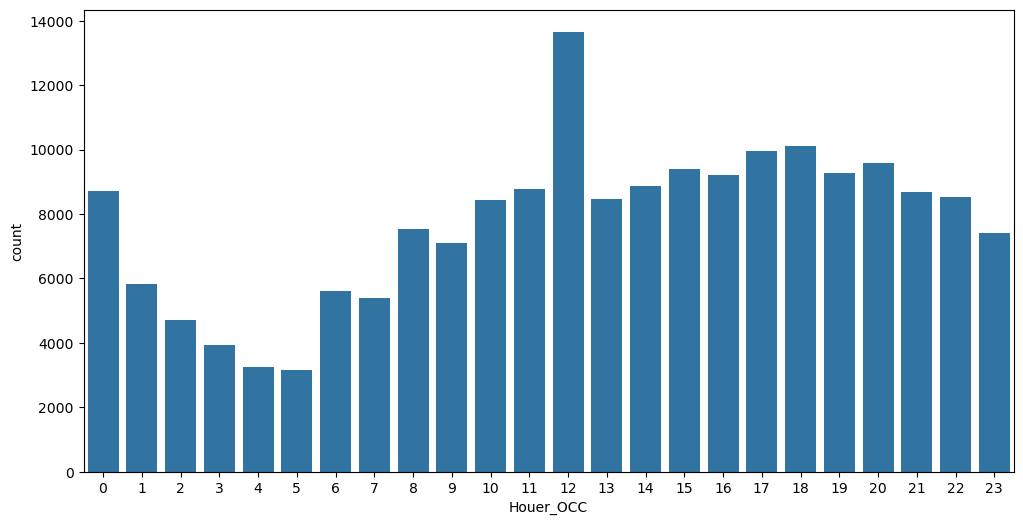

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns   
plt.figure(figsize=(12,6))
sns.countplot(data = crimes ,x="Houer_OCC")
plt.show()

In [19]:
peak_crime_houer = 12
night_time_crime =crimes[crimes["Houer_OCC"].isin([22,23,0,1,2,3])]
night_time_crime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Houer_OCC
8,231207476,2023-02-27,2020-08-15,0001,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,0
10,221711184,2022-06-15,2020-05-15,0155,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,1
30,221314362,2022-07-11,2020-04-07,0001,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,0
33,231307252,2023-03-03,2020-07-05,2305,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23
36,221614254,2022-11-13,2020-01-01,0001,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185687,231306158,2023-02-11,2023-02-08,2200,Newton,BURGLARY FROM VEHICLE,38,M,H,NaN,Invest Cont,1700 E 16TH ST,22
185695,231212224,2023-05-17,2023-05-17,2300,77th Street,VIOLATION OF RESTRAINING ORDER,35,F,H,NaN,Invest Cont,8200 S MAIN ST,23
185700,231300825,2023-06-07,2023-06-07,2203,Newton,BATTERY - SIMPLE ASSAULT,45,F,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,2300 WALL ST,22
185701,230908346,2023-04-19,2023-04-18,2243,Van Nuys,THEFT OF IDENTITY,34,F,B,NaN,Invest Cont,4800 COLDWATER CANYON AV,22


In [28]:
# Group by "AREA NAME" and count occurrences, filtering for the largest value and saving the "AREA NAME"
peak_night_crime_location = night_time_crime.groupby("AREA NAME",as_index = False )["Houer_OCC"].count().sort_values("Houer_OCC",ascending=False).iloc[0]["AREA NAME"]
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")

The area with the largest volume of night crime is Central


In [31]:
## Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+) 
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']
crimes['age_Bracket'] = pd.cut(crimes['Vict Age'] , bins = age_bins , labels = age_labels)


In [36]:
victems_age = crimes['age_Bracket'].value_counts().sort_index()
print(victems_age)

age_Bracket
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: count, dtype: int64


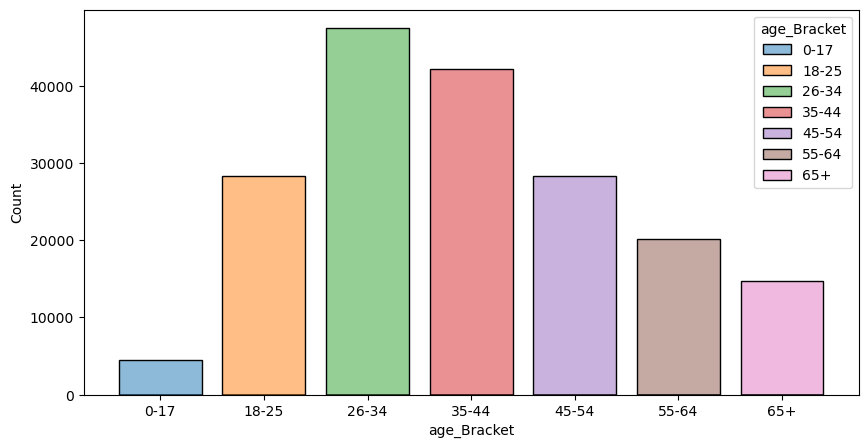

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(data = crimes , x = 'age_Bracket',hue = 'age_Bracket',shrink=0.8)
plt.show()

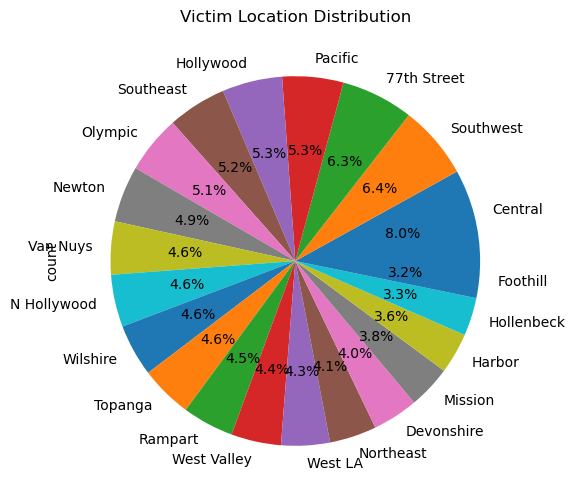

In [66]:
crimes['AREA NAME'].value_counts()
crimes['AREA NAME'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(9,6), title='Victim Location Distribution')
plt.show()
 

AREA NAME
Central        14944
Southwest      11945
77th Street    11739
Pacific         9923
Hollywood       9762
Southeast       9571
Olympic         9414
Newton          9152
Van Nuys        8621
N Hollywood     8502
Wilshire        8482
Topanga         8478
Rampart         8346
West Valley     8102
West LA         7911
Northeast       7628
Devonshire      7411
Mission         6990
Harbor          6618
Hollenbeck      6193
Foothill        5983
Name: count, dtype: int64